## Energy Based Models ## 
Walk through the in class example of training energy based models 
from [NYU Deep Learning Class](https://atcold.github.io/NYU-DLSP20/en/week15/15-1/)

We will start by creating our manifold and visualizing it to see the points 
to which we'd like to learn to have 'low energy'

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# model and producing y's 
alpha = 1.5
beta = 2

def expand_x(x, alpha, beta): 
    """projects x into a 2D space using alpha and beta parameters for x in [0,1]"""
    return (np.array([alpha*x + beta*(1-x), alpha*(1-x) + beta*x]) * np.exp(2*x)).T

def sample_y(x, thetas):
    """samples n y's from the model y = x^T theta + epsilon"""
    x = expand_x(x, alpha, beta)
    outputs = np.zeros((x.shape[0], len(thetas), 2))
    epsilon = np.random.normal(0, (1/10)**2, outputs.shape[:2])

    for i, theta in enumerate(thetas):
        outputs[:, i, 0] = x[:, 0] * np.sin(theta) + epsilon[:, i]
        outputs[:, i, 1] = x[:, 1] * np.cos(theta) + epsilon[:, i]
    
    return outputs

x = np.linspace(0, 1, 10)
theta = np.linspace(0, 2*np.pi, 24)
n = 100
y = sample_y(x, theta)
y.shape

(10, 24, 2)

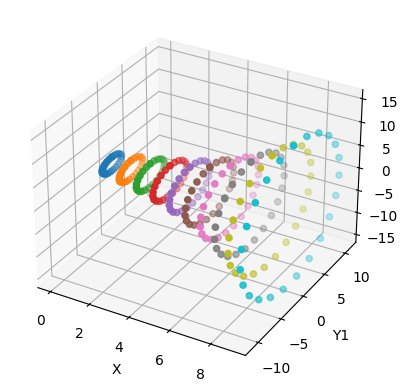

In [37]:
def plot_mainfold(y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = y.shape[0]

    for i in range(n):
        ax.scatter(np.full((y.shape[1],), i), y[i, :, 0], y[i, :, 1])
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y1')
    ax.set_zlabel('Y2')
    plt.show()

plot_mainfold(y)

### Training ### 
Nice! ok now we will need to compute some sort of energy function, and choose a loss function
such that we can train our system. Our system will only have a neural net in the predictor part, 
which will be combined with our latent variable (theta in this case) to produce our estimate 
$\hat{y}$

In [ ]:
def decoder_manual(z, f):
    """
    decodes using our latent variable z and the output of our predictor
    f into our predicted y's
    """
    # arbitrarily come up with some decoder that maps us to an elipsis in 2D
    return f.T @ np.array([np.sin(z), np.cos(z)])


def energy_func(y, g):
    """
    computes the energy function for the given y, z, and w where w are the outputs
    of our neural net 
    """
    return np.sum((y - g)**2, axis=1)

In [ ]:
import torch
import torch.nn as nn

class Predictor(nn.Module):
    """
    predictor network - we just need a neural network that takes a scalar input (x) 
    and returns a 2D output  (y1, y2)
    """
    def __init__(self):
        super(Predictor, self).__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return x